<a href="https://colab.research.google.com/github/pranav-kaushal/NLP-Project-Sentiment-Analysis/blob/main/Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scotiabank Twitter Sentiment Analysis

API account
https://developer.twitter.com/en/portal/dashboard

In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install langdetect
!pip install nltk
!pip install unidecode
!pip install textaugment
!pip install joypy
!pip install wordcloud
!pip install better_profanity

     |████████████████████████████████| 981 kB 5.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993241 sha256=dc39101d8b7c933b6d5ed363b85730679978a066428096e2da049579a4a9c539
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
     |████████████████████████████████| 241 kB 5.2 MB/s 
     |████████████████████████████████| 55 kB 2.3 MB/s 
     |████████████████████████████████| 1.2 MB 11.0 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 65 kB 3.3 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15734 sha256=8225a633a7198090b8b9505b1cd6ef2a8ca8e847d15d48ab4823989be2cfbcdd
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans
     |████

In [2]:
# Import Libraries
import sys
import tweepy
import pandas as pd
import numpy as np
import os
import spacy
import joypy
import unidecode
import unicodedata
import seaborn as sns
from PIL import Image

# NLP Libraries
import re
import string
import nltk
nltk.download('brown')
from matplotlib import pyplot as plt
from matplotlib import cm
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from nltk.util import ngrams
import matplotlib.pyplot as plt
from nltk.corpus import brown
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perception_tagger')
nltk.download('omw')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from better_profanity import profanity

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Error loading averaged_perception_tagger: Package
[nltk_data]     'averaged_perception_tagger' not found in index
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Gathering Data from Twitter using API

### Authentication Keys (Individual Account)

In [3]:
# Authentication
consumerKey = "Gqxmwe06eIqw0NBmCi0L1rmbh"
consumerSecret = "cborR6m0P5LnLB1U2WV4Wz4zI4Wazs9BE1v31x2bcMeeSkm0pf"
accessToken = "1378575615981457409-Aotg3k1WfJu8l8kM8sbs2utHbTFeaO"
accessTokenSecret = "RmH71WeV1XyF66veJJh78vILJ5lt5MqaNNPpbQqZ8E2jm"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify = True)

### Gathering Tweets- Tweet cap 
500,000 Tweets / month
PER PROJECT

In [4]:
# User Search and No of Tweets to capture
tweet_lst=[]
users = ['@globeinvestor','@bloombergCA','@Marketcall','@LA&C Investments','@TheMotleyFoolCA','@BNNBloomberg','@YahooFinanceCA','@StockTrades_CA','@rcarrick','@marketsglobe','@PattieCTV','@Streetwise','@stockchase',
'@financialpost','@FinMKTG','@JonChevreau','@MoneySense','@BoomerandEcho','@squawkfox','@reformedbroker','@thestalwart' ,'@michaelbabad','@FTalphaville','@dbcurren',
'@benrabidoux','@noahpinion','@boes_','@sbarlow_ROB','@amberkanwar','@business','@elerianm','@reutersjamie','@M_C_Klein',
'@economistmeg','@tylercowen','@nictrades','@ReformedBroker','@TheStalwart','@VitalikButerin','@ritholtz','@LizAnnSonders',
'@IvanTheK','@charliebilello','@satoshilite',
'@ritholtz','@awealthofcs','@RaoulGMI','@MarkYusko','@allstarcharts','@5_min_macro','@longshorttrader','@ScottMinerd','@Callum_Thomas','@RyanDetrick','@TheBubbleBubble','@KeithMcCullough',
'@Ukarlewitz','@cullenroche','@DougKass']

# Failed to retrieve
#'@LA&C Investments','@katie_martin_FX','@mikepmoffat'


# For loop to run the list of usernames and then for loop to extract Full Text from the tweets
for user in users:
    tweets = api.user_timeline(screen_name = user, count = 100, lang = "en", tweet_mode = "extended")
    for tweet in tweets:
      tweet_lst.append(tweet.full_text)
    #print(f"- {tweet.full_text}")


In [5]:
# Keyword Search and No of Tweets to capture
search_keyword = ['scotiabank','BNS','Canadian Banking','Canadian Banks','Earnings release','EPS','Profits','Reserves','Provisions',
                  'Credit cards','Personal loans','Loan growth','Loan origination','Credit quality','Delinquency','Past due loans',
                  'Impaired loans','Allowances','Reserves','Loan loss','Credit loss','Vintage','Write offs','Collections','Strategy',
                  'Big5','PCL', 'Risk','Retail lending','Secured loans','Unsecured loans','Mortgages','Home equity loans','Auto loans',
                  'Line of credit']
# For loop to run the list of keywords and then for loop to extract Full Text from the tweets
for search in search_keyword:
    tweets = api.search(q = search, lang = "en",tweet_mode = "extended",count = 100, coordinates = "-79.384293,43.653908,10000km")
    for tweet in tweets:
      tweet_lst.append(tweet.full_text)
tweet_lst[:5]

['As restaurants begin to reopen, how are their stocks doing? https://t.co/XRy6pORC0N',
 'Managing your personal finances on a smartphone? It’s addictive https://t.co/KrAOLrtv8h',
 'Cash-hungry emerging markets arrive late to the SPAC party https://t.co/jaXSCsKPQE',
 'It’s been a great earnings season so far - with one big caveat. Plus, TSX-beating ETFs and depositary receipts for U.S. stocks come to Canada https://t.co/BQfLuH3wju',
 'RT @MarketsGlobe: Canadian dollar adds to last week’s gains as greenback slides https://t.co/zLjUd27gcB (subscribers)']

In [6]:
# Print and analyze the tweets in raw text
tweet_lst[0:-1]

['As restaurants begin to reopen, how are their stocks doing? https://t.co/XRy6pORC0N',
 'Managing your personal finances on a smartphone? It’s addictive https://t.co/KrAOLrtv8h',
 'Cash-hungry emerging markets arrive late to the SPAC party https://t.co/jaXSCsKPQE',
 'It’s been a great earnings season so far - with one big caveat. Plus, TSX-beating ETFs and depositary receipts for U.S. stocks come to Canada https://t.co/BQfLuH3wju',
 'RT @MarketsGlobe: Canadian dollar adds to last week’s gains as greenback slides https://t.co/zLjUd27gcB (subscribers)',
 'The rich are (probably) getting richer https://t.co/K8P5a4Gxhq',
 'RT @MarketsGlobe: Premarket: World stocks drop on China clampdown as investors await Fed, earnings https://t.co/kp7n7Fzmvk (subscribers)',
 'Fed meeting may test low U.S. Treasury yields https://t.co/c98PsVqVQR',
 'Law without order: investors grapple with China’s regulatory risk https://t.co/VHhZdaPEy9',
 'COVID-19 wobble punctures calm markets https://t.co/ATFIT7sjre'

In [7]:
# Create a copy of the list to work on
tw_copy = tweet_lst.copy()

### Using Pipeline to clean text

Make text lowercase
Remove punctuation
Remove emoji’s
Remove stopwords
Lemmatization

In [8]:
# Cleaning pipeline (RT, Punctuation etc)

stop_words = set(stopwords.words('english')+['http','rt','https'])

lemmer = WordNetLemmatizer()

def preprocess(x):
    # Remove HTML tags
    x = BeautifulSoup(x, "lxml").get_text()
    # The profanity.censor method is used to mask inappropriate words with special characters. The default setting uses “*”
    x = profanity.censor(x)
    #Removing RT
    x = re.sub('RT @\w+: '," ",x)
    # Remove all single characters
    x = re.sub(r'\s+[a-zA-Z]\s+', ' ',x)
    # Remove punctuation
    x = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
    # Lower case
    x = x.lower()
    # Remove non-unicode
    x = unidecode.unidecode(x)
    # Remove numbers
    x = re.sub(r'\d+', '', x)
    # Remove stopwords and lemmatize
    x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x)

In [9]:
# Test preprocessing pipeline
preprocess('RT http:// @ #$#% what the duck is wrong with the bank')

'duck wrong bank'

In [10]:
# Import re module to use regular expression
import re
# Declare a list that contains the search word
#search_word = "playoff"
list1 = []
# Using lambda expression filter the data
for x in tw_copy:
  if "playoff" not in x:
    list1.append(x)
  elif "arena" not in x:
    list1.append(x)
  elif "game" not in x:
    list1.append(x)
  elif "hockey" not in x:
    list1.append(x)
  elif "NHL" not in x:
    list1.append(x)
  elif "StanleyCup" not in x:
    list1.append(x)

In [11]:
tweet_list = pd.DataFrame(list1)  # Converting the list to Pandas DataFrame
tweet_list.columns=['tweets'] # Renaming the column 0 to tweets
tweet_list.head() # Display first 5 rows

,tweets
0,"As restaurants begin to reopen, how are their ..."
1,Managing your personal finances on a smartphon...
2,Cash-hungry emerging markets arrive late to th...
3,It’s been a great earnings season so far - wit...
4,RT @MarketsGlobe: Canadian dollar adds to last...


In [12]:
# Apply Preprocessing pipeline to Tweets Dataframe
tweet_list['tweets'] = tweet_list['tweets'].apply(preprocess)
# Check for duplicates and drop them.
tweet_list['tweets'].drop_duplicates(inplace = True)

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/SfFbEzysQn" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/LVooRyojRD" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/ZipWyy0Leo" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

## Sentiment Analysis using TextBlob

In [13]:
#Calculating Negative, Positive, Neutral and Compound values
# TextBlod finds all the words and phrases that it can assign polarity and subjectivity to, and average all of them together. 
  #Sentiment Labels: Each word in a corpus is labeled in terms of polarity and subjectivity. A corpus’ sentiment is the average of these.
  #Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
  #Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

tweet_list[['polarity', 'subjectivity']] = tweet_list['tweets'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweet_list['tweets'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tweet_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tweet_list.loc[index, 'sentiment'] = "positive"
    else:
        tweet_list.loc[index, 'sentiment'] = "neutral"
    tweet_list.loc[index, 'neg'] = neg
    tweet_list.loc[index, 'neu'] = neu
    tweet_list.loc[index, 'pos'] = pos
    tweet_list.loc[index, 'compound'] = comp

tweet_list.head(10)

,tweets,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,restaurant begin reopen stock,0.000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,managing personal finance smartphone addictive,0.000,0.600000,neutral,0.000,1.000,0.000,0.0000
2,cash hungry emerging market arrive late party,-0.300,0.600000,positive,0.000,0.690,0.310,0.4019
3,great earnings season far one big caveat plus ...,0.300,0.616667,positive,0.142,0.664,0.194,0.2732
4,canadian dollar add last week gain greenback s...,0.000,0.066667,positive,0.000,0.702,0.298,0.5267
5,rich probably getting richer,0.375,0.750000,positive,0.000,0.222,0.778,0.7906
6,premarket world stock drop china clampdown inv...,0.000,0.000000,negative,0.168,0.720,0.112,-0.1779
7,fed meeting may test low u treasury yield,0.000,0.300000,negative,0.236,0.562,0.202,-0.0772
8,law without order investor grapple china regul...,0.000,0.000000,negative,0.231,0.769,0.000,-0.2732
9,covid wobble puncture calm market,0.300,0.750000,positive,0.000,0.635,0.365,0.3182


In [14]:
# Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tweet_list[tweet_list["sentiment"]=="negative"]
tw_list_positive = tweet_list[tweet_list["sentiment"]=="positive"]
tw_list_neutral = tweet_list[tweet_list["sentiment"]=="neutral"]

In [15]:
tw_list_negative.head()

,tweets,polarity,subjectivity,sentiment,neg,neu,pos,compound
6,premarket world stock drop china clampdown inv...,0.0,0.000000,negative,0.168,0.720,0.112,-0.1779
7,fed meeting may test low u treasury yield,0.0,0.300000,negative,0.236,0.562,0.202,-0.0772
8,law without order investor grapple china regul...,0.0,0.000000,negative,0.231,0.769,0.000,-0.2732
15,five metric bond investor watching covid fear ...,0.0,0.000000,negative,0.314,0.686,0.000,-0.4939
30,bad breadth whiff danger market gain lack scope,-0.7,0.666667,negative,0.554,0.241,0.205,-0.7003


In [16]:
# Function for count_values_in single columns
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [17]:
#Count_values for sentiment
count_values_in_column(tweet_list,"sentiment")

,Total,Percentage
positive,4281,47.96
neutral,2754,30.85
negative,1891,21.19


# EDA (Exploratory Data Analysis)

### Hastag Frequency

In [18]:
# Function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

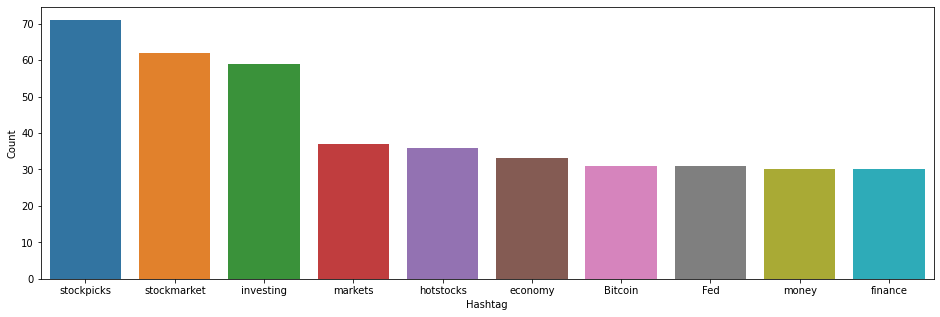

In [19]:
HT = hashtag_extract(tw_copy) # Using the original list which is uncleaned to extract hashtags
# unnesting list
HT = sum(HT,[])
a = nltk.FreqDist(HT)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [20]:
# Tokenize the Tweets
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer

def tokenize_tweets(myString):
    tokens = word_tokenize(myString)
    #stemmer = PorterStemmer()
    #result = ([stemmer.stem(w).lower() for w in x.split()]) for x in tokens if x.lower() not in stopwords.words('english')]
    result = [token.lower() for token in tokens if token.lower() not in stop_words]
    return result

tok_tweet_list = tweet_list['tweets'].apply(tokenize_tweets)
print(tok_tweet_list)

0                      [restaurant, begin, reopen, stock]
1       [managing, personal, finance, smartphone, addi...
2       [cash, hungry, emerging, market, arrive, late,...
3       [great, earnings, season, far, one, big, cavea...
4       [canadian, dollar, add, last, week, gain, gree...
                              ...                        
8921    [biden, issued, strong, statement, support, cu...
8922    [biden, issued, strong, statement, support, cu...
8923    [biden, issued, strong, statement, support, cu...
8924    [biden, issued, strong, statement, support, cu...
8925    [biden, issued, strong, statement, support, cu...
Name: tweets, Length: 8926, dtype: object


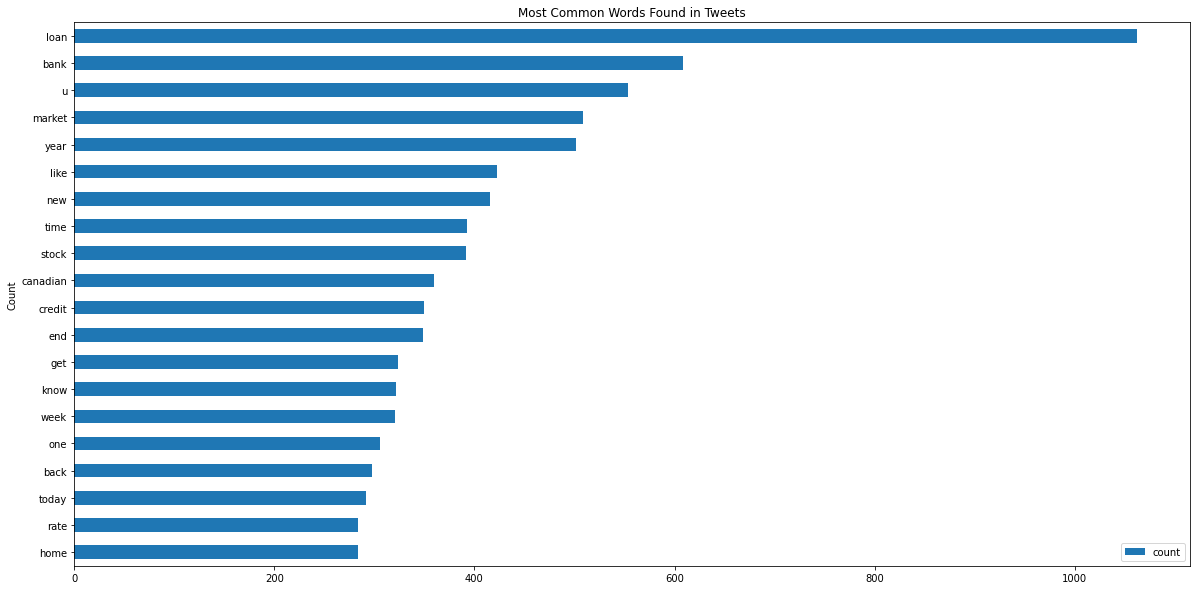

In [21]:
# Returns most common terms, aside from stop words #
import itertools
import collections
# List of all words across tweets
def most_common(terms_all):
  words_in_tweet = [tweet for tweet in terms_all]
  interesting_terms = list(itertools.chain(*words_in_tweet))
  # Create counter
  counts = collections.Counter(interesting_terms)
  return counts.most_common(20)

# Plot horizontal bar graph

most_comm = pd.DataFrame(most_common(tok_tweet_list),columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(20, 10))
most_comm.sort_values(by='count').plot.barh(x='words',y='count',ax=ax)
ax.set_title("Most Common Words Found in Tweets")
ax.set(ylabel = 'Count')
plt.show()

### Wordcloud

In [22]:
from nltk.tokenize import WordPunctTokenizer
from nltk import PorterStemmer
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

def get_bigrams(myString):
    tokenizer = WordPunctTokenizer()
    tokens = tokenizer.tokenize(myString)
    stemmer = PorterStemmer()
    bigram_finder = BigramCollocationFinder.from_words(tokens)
    bigrams = bigram_finder.nbest(BigramAssocMeasures.pmi,100)

    for bigram_tuple in bigrams:
        x = "%s %s" % bigram_tuple
        tokens.append(x)

    result = [' '.join([stemmer.stem(w).lower() for w in x.split()]) for x in tokens if x.lower() not in stopwords.words('english') and len(x) > 4]
    return result

for line in tweet_list['tweets']:
    features = get_bigrams(line)
print(features)

['biden', 'issu', 'strong', 'statement', 'support', 'cuban', 'protest', 'instead', 'roll', 'trump', 'sanction', 'impos', 'addit', 'back trump', 'biden issu', 'cuban protest', 'impos addit', 'instead roll', 'issu strong', 'protest instead', 'roll back', 'sanction impos', 'statement support', 'strong statement', 'support cuban', 'trump sanction']


In [23]:
#Function to Create Wordcloud
def create_wordcloud(text):
  stopwords = set(STOPWORDS)
  wc = WordCloud(stopwords=stopwords,max_words=200,background_color="Black", )
  wc.generate(text)
  wc.to_file("wc.png")
  #print("Word Cloud Saved Successfully")
  path="wc.png"
  display(Image.open(path))

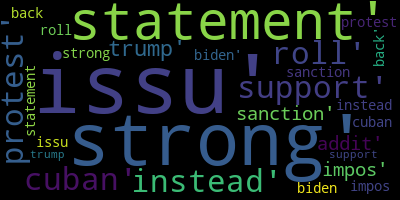

In [24]:
#create_wordcloud(NewNounString)
create_wordcloud(str(features))

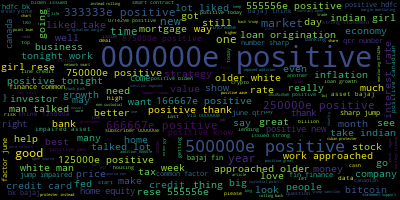

(None,)

In [25]:
create_wordcloud(tw_list_positive.to_string()),

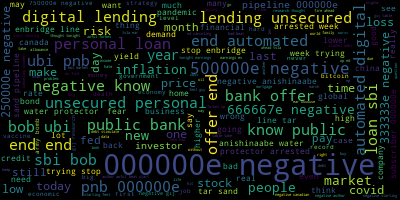

In [26]:
create_wordcloud(tw_list_negative.to_string())

### Joyplot

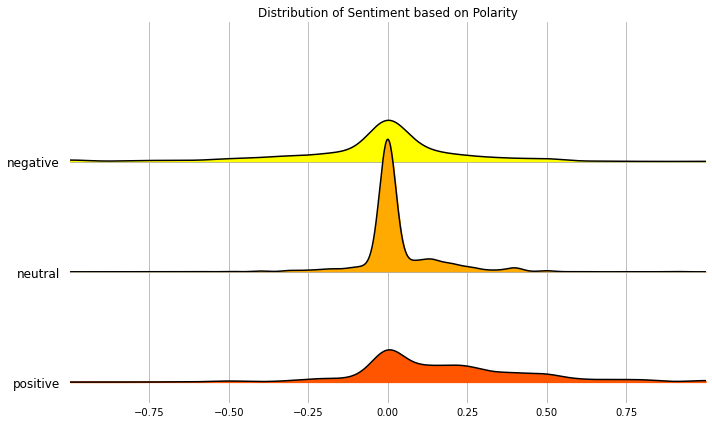

In [27]:
# Joy Plot
import matplotlib

sm = matplotlib.cm.ScalarMappable(cmap=cm.autumn_r)
%matplotlib inline
ar = tweet_list.value_counts()
fig, axes = joypy.joyplot(tweet_list ,grid=True,by=['sentiment'],column=['polarity'],ylabelsize=12,title="Distribution of Sentiment based on Polarity",figsize=(10,6),colormap=cm.autumn_r,x_range=[-1,0,1])

References:
https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

https://github.com/yalinyener/TwitterSentimentAnalysis/blob/master/SentimentAnalysis.ipynb

https://towardsdatascience.com/detecting-hate-tweets-twitter-sentiment-analysis-780d8a82d4f6

https://github.com/DrManishSharma/NLP/blob/master/SentiAnalysis.ipynb

Topic Modeling

In [28]:
# LDA or Latent Dirchlet Allocation, is one of the most popular topic modeling algorithms around. 
# LDA is a generative statistical model that allows observations to be explained by unobserved groups that explain why parts of the data are similar. 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.2, min_df=0.02, max_features = 1000, ngram_range = [1,2])
dtm = vectorizer.fit_transform(tweet_list['tweets'])

In [29]:
dtm.shape

(8926, 48)

In [30]:
vectorizer.get_feature_names()

['also',
 'back',
 'bank',
 'big',
 'canadian',
 'company',
 'credit',
 'day',
 'earnings',
 'end',
 'first',
 'get',
 'good',
 'high',
 'home',
 'inflation',
 'know',
 'last',
 'lending',
 'like',
 'loan',
 'make',
 'market',
 'money',
 'mortgage',
 'much',
 'need',
 'new',
 'one',
 'people',
 'personal',
 'price',
 'rate',
 'risk',
 'say',
 'see',
 'still',
 'stock',
 'subscriber',
 'take',
 'think',
 'time',
 'today',
 'via',
 'week',
 'work',
 'would',
 'year']

In [31]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components = 10, doc_topic_prior = None, topic_word_prior = None, max_iter = 200, learning_method = 'batch', random_state = 123, n_jobs = 2, verbose =0)
lda_output = lda_model.fit(dtm)

In [32]:
feature_names = vectorizer.get_feature_names()
termss = list()
for topic_id, topic in enumerate(lda_model.components_):
  terms = ' '.join([feature_names[i] for i in topic.argsort()[:-6 - 1:-1]])
  termss.append(terms)

topic_summary = pd.DataFrame({'TopicID':range(0, len(termss)), 'Terms': termss})

In [33]:
topic_summary

,TopicID,Terms
0,0,new big high mortgage price rate
1,1,think end day lending know loan
2,2,loan like good need say bank
3,3,week today one take last work
4,4,time home company first see work
5,5,market canadian money bank rate loan
6,6,year subscriber inflation still canadian price
7,7,get back stock much like know
8,8,credit risk make one know loan
9,9,via earnings people would know like


#Modeling

In [34]:
# Using the Regex tokenizer from NLTK
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(tweet_list['tweets'])

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, tweet_list['tweets'], test_size=0.25, random_state=5)

In [36]:
# Using NLTK Regex Tokenizer
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)

In [38]:
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

21.24%


In [39]:
# Using TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(tweet_list['tweets'])

#splitting the data in test and training
#from sklearn.model_selection() import train_test_split()
x_train, x_test, y_train, y_test = train_test_split(text_count_2, tweet_list['sentiment'],test_size=0.25,random_state=5)

#defining the model
#compilimg the model -> we are going to use already used models GNB, MNB, CNB, BNB
MNB = MultinomialNB()
MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)
print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(x_train, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

from sklearn.naive_bayes import ComplementNB
CNB = ComplementNB()
CNB.fit(x_train, y_train)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(x_test), y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train.todense(), y_train)
accuracy_score_gnb = metrics.accuracy_score(GNB.predict(x_test.todense()), y_test)
print('accuracy_score_gnb = '+str('{:4.2f}'.format(accuracy_score_gnb*100))+'%')

accuracy_score_mnb = 64.74%
accuracy_score_bnb = 77.11%
accuracy_score_cnb = 73.92%
accuracy_score_gnb = 65.91%


In [40]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
SGDC = SGDClassifier()
LSVC = LinearSVC()

#on TF-IDF data
LSVC.fit(x_train, y_train)
accuracy_score_lsvc = metrics.accuracy_score(LSVC.predict(x_test), y_test)
print('accuracy_score_lsvc = '+str('{:4.2f}'.format(accuracy_score_lsvc*100))+'%')

SGDC.fit(x_train, y_train)
accuracy_score_sgdc = metrics.accuracy_score(SGDC.predict(x_test), y_test)
print('accuracy_score_sgdc = '+str('{:4.2f}'.format(accuracy_score_sgdc*100))+'%')

#on CountVectorize data
LSVC.fit(X_train, Y_train)
accuracy_score_lsvc_CV = metrics.accuracy_score(LSVC.predict(X_test), Y_test)
print('accuracy_score_lsvc_cv = '+str('{:4.2f}'.format(accuracy_score_lsvc_CV*100))+'%')

SGDC.fit(X_train, Y_train)
accuracy_score_sgdc_CV = metrics.accuracy_score(SGDC.predict(X_test), Y_test)
print('accuracy_score_sgdc_cv = '+str('{:4.2f}'.format(accuracy_score_sgdc_CV*100))+'%')

accuracy_score_lsvc = 85.17%
accuracy_score_sgdc = 84.63%
accuracy_score_lsvc_cv = 28.09%
accuracy_score_sgdc_cv = 26.84%
